In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import matplotlib.dates as mdates
from time import time
import scipy.io

In [2]:
import helper_functions as hf

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'
sns.set(style='whitegrid', palette='deep', font_scale=1.2)
# this is for setting the precision to 4, so the data is better distributed on screen
# and the maximum number of columns to display
pd.set_option('max_columns',40, 'precision',4)

In [4]:
# defining some constants
Type=['Network Coordinator', 'Radio - 2.4 GHz','Acquisition - Temperature',
      'Acquisition - Current / Voltage', 'Power - Solar Panel', 'Power - AC/DC Input']

Modules={"00.57.FE.04":'Net-Coordinator',
         "00.57.FE.0E":'Radio-2.4 GHz',
         "00.57.FE.0F":'Radio-2.4 GHz',
         "00.57.FE.06":'Radio-2.4 GHz',
         "00.57.FE.09":'Radio-2.4 GHz',
         "00.57.FE.01":'Radio-2.4 GHz',
         "00.57.FE.05":'Radio-2.4 GHz',
         "00.57.FE.03":'Radio-2.4 GHz',
         "29.E5.5A.24":'Acq-Tempe',
         "A7.CB.0A.C0":'Acq-Current/Volt',
         "34.B2.9F.A9":'P-Solar Panel',
         "01.E9.39.32":'Acq-Current/Volt',
         "A4.0D.82.38":'P-AC/DC Input',
         "9F.8D.AC.91":'Acq-Tempe',
         "50.39.E2.80":'P-Solar Panel'}

column_names=['Timestamp','Module','Type','Temp_Mod', 'VBus',
              'PT100(0)', 'PT100(1)', 'LVL_Dim(1)', 'V_MPPT', 
              'V_Panel','LVL_Drain(1)','VBat', 'V_Supp','Temp_Oil',
              'Temp_gab','V_MPPT_TE','V_Panel_TE']

columns_radio = ['Timestamp','Module','Type', 'Transmitter', 'N1', 'P_N1(dbm)',
                 'N2', 'P_N2(dbm)', 'N3', 'P_N3(dbm)',
                 'N4','P_N4(dbm)', 'N5', 'P_N5(dbm)',
                 'N6', 'P_N6(dbm)', 'N7','P_N7(dbm)']

columns_radio2 = ['Timestamp','Module','Type', 'Receiver', 'Tx1', 'P_Tx1(dbm)',
                 'Tx2', 'P_Tx2(dbm)', 'Tx3', 'P_Tx3(dbm)',
                 'Tx4','P_Tx4(dbm)', 'Tx5', 'P_Tx5(dbm)',
                 'Tx6', 'P_Tx6(dbm)', 'Tx7','P_Tx7(dbm)']

## Loading the data and adding extra features

In [10]:
# Loading the data
df = pd.read_csv('../../Features.csv', usecols=column_names, parse_dates=['Timestamp'], infer_datetime_format=True)
df.set_index('Timestamp', drop=True, inplace=True)
df = hf.add_date_features(df)
df.head()

,Module,Type,Temp_Mod,VBus,PT100(0),PT100(1),LVL_Dim(1),V_MPPT,V_Panel,LVL_Drain(1),VBat,V_Supp,Temp_Oil,Temp_gab,V_MPPT_TE,V_Panel_TE,hour,day,month,week,weekday,daylight,weekend
Timestamp,,,,,,,,,,,,,,,,,,,,,,,
2017-10-01 00:00:05,00.57.FE.04,Net-Coordinator,25.3,4.736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,10,39,6,0,1
2017-10-01 00:00:42,00.57.FE.04,Net-Coordinator,25.3,4.743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,10,39,6,0,1
2017-10-01 00:01:13,00.57.FE.04,Net-Coordinator,25.3,4.743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,10,39,6,0,1
2017-10-01 00:01:42,00.57.FE.04,Net-Coordinator,25.3,4.743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,10,39,6,0,1
2017-10-01 00:02:05,00.57.FE.04,Net-Coordinator,25.3,4.743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,10,39,6,0,1


#### Show some basic information, like the amounth of null data

In [11]:
print(df.info())
print('\nNull Values {}'.format(df.isnull().sum()))
print('\nNaN Values {}'.format(df.isna().sum()))
#df_temperatures.where(df_temperatures== np.NaN).sum()
#df_temperatures.where(df_temperatures== 30).sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7847000 entries, 2017-10-01 00:00:05 to 2020-02-21 19:29:04
Data columns (total 23 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Module        object 
 1   Type          object 
 2   Temp_Mod      float64
 3   VBus          float64
 4   PT100(0)      float64
 5   PT100(1)      float64
 6   LVL_Dim(1)    float64
 7   V_MPPT        float64
 8   V_Panel       float64
 9   LVL_Drain(1)  float64
 10  VBat          float64
 11  V_Supp        float64
 12  Temp_Oil      float64
 13  Temp_gab      float64
 14  V_MPPT_TE     float64
 15  V_Panel_TE    float64
 16  hour          int64  
 17  day           int64  
 18  month         int64  
 19  week          int64  
 20  weekday       int64  
 21  daylight      int32  
 22  weekend       int32  
dtypes: float64(14), int32(2), int64(5), object(2)
memory usage: 1.3+ GB
None

Null Values Module                0
Type                  0
Temp_Mod              0
VBus            

##### Let's describe the dataset. This shows intersting information like means, max and min values

We can see a description of the modules tempratures. Characteristics like max, min, mean values, standard deviation, lower percentile (25%), higher percentile (75%) and median value.

In [14]:
df.groupby('Module').describe()

Temp_Mod                                                 \
                 count     mean     std   min   25%   50%   75%   max   
Module                                                                  
00.57.FE.01   440658.0  30.4625  8.9760   5.6  24.1  27.6  36.1  61.8   
00.57.FE.03   486828.0  32.8362  7.3269   8.1  27.1  31.3  38.7  55.2   
00.57.FE.04  2516426.0  26.7424  2.3228  23.6  25.7  26.4  27.0  43.5   
00.57.FE.05   584781.0  34.4410  2.2282  25.7  33.0  34.6  36.1  46.8   
00.57.FE.06   626840.0  34.7139  2.2046  24.7  33.4  35.2  36.2  39.6   
00.57.FE.09   323537.0  29.8001  6.3345  11.0  25.3  28.8  34.4  49.7   
00.57.FE.0E   514892.0  27.9529  7.0415   6.1  23.5  26.4  32.3  58.3   
00.57.FE.0F   622643.0  31.6147  1.9436  23.5  30.2  32.1  33.0  36.7   
01.E9.39.32   287468.0  29.3734  1.8956  22.2  28.2  29.8  30.8  34.0   
29.E5.5A.24   323891.0  26.7427  6.0763   5.6  22.6  25.5  31.6  45.3   
34.B2.9F.A9   167044.0  28.2278  6.5829   6.6  23.5  26.6  33.7  48.2   
50.39.E2.80   179294.0  28.2632  7.3538   4.8  22.7  26.5  34.0  51.8   
9F.8D.AC.91   305505.0  27.8559  7.6319   1.0  22.1  26.4  34.3  47.6   
A4.0D.82.38   228384.0  30.9525  1.8632  23.7  29.7  31.3  32.3  35.6   
A7.CB.0A.C0   238809.0  27.4256  6.0334   6.3  23.2  26.2  32.3  44.2   

                  VBus                                                     \
                 count    mean     std    min    25%    50%    75%    max   
Module                                                                      
00.57.FE.01   440658.0  4.9576  0.0198  4.448  4.952  4.963  4.968  5.024   
00.57.FE.03   486828.0  3.2000  0.1674  1.376  3.179  3.207  3.228  3.563   
00.57.FE.04  2516426.0  4.7362  0.0078  4.568  4.736  4.736  4.743  4.776   
00.57.FE.05   584781.0  5.2683  0.0128  4.935  5.263  5.268  5.272  5.301   
00.57.FE.06   626840.0  4.9845  0.0028  4.851  4.984  4.984  4.984  5.008   
00.57.FE.09   323537.0  4.9995  0.0052  4.856  4.996  5.003  5.003  5.080   
00.57.FE.0E   514892.0  3.3379  0.1023  2.596  3.264  3.275  3.456  3.591   
00.57.FE.0F   622643.0  4.2727  0.0121  3.755  4.263  4.268  4.280  4.331   
01.E9.39.32   287468.0  4.3188  0.0033  4.245  4.318  4.319  4.320  4.326   
29.E5.5A.24   323891.0  3.3187  0.1227  3.085  3.235  3.241  3.440  3.544   
34.B2.9F.A9   167044.0  3.3587  0.1176  3.223  3.278  3.283  3.475  3.560   
50.39.E2.80   179294.0  3.3089  0.1549  2.186  3.294  3.301  3.326  3.606   
9F.8D.AC.91   305505.0  3.2317  0.1604  2.069  3.211  3.222  3.250  3.561   
A4.0D.82.38   228384.0  4.3050  0.0024  4.294  4.302  4.307  4.307  4.313   
A7.CB.0A.C0   238809.0  3.3335  0.1230  3.170  3.250  3.258  3.444  3.557   

             PT100(0)                        ...  week                    \
                count     mean     std  min  ...   25%   50%   75%   max   
Module                                       ...                           
00.57.FE.01       0.0      NaN     NaN  NaN  ...  12.0  23.0  42.0  52.0   
00.57.FE.03       0.0      NaN     NaN  NaN  ...  11.0  28.0  42.0  52.0   
00.57.FE.04       0.0      NaN     NaN  NaN  ...  12.0  28.0  42.0  52.0   
00.57.FE.05       0.0      NaN     NaN  NaN  ...  11.0  26.0  40.0  52.0   
00.57.FE.06       0.0      NaN     NaN  NaN  ...  12.0  28.0  42.0  52.0   
00.57.FE.09       0.0      NaN     NaN  NaN  ...  18.0  32.0  43.0  52.0   
00.57.FE.0E       0.0      NaN     NaN  NaN  ...  13.0  27.0  43.0  52.0   
00.57.FE.0F       0.0      NaN     NaN  NaN  ...  12.0  28.0  42.0  52.0   
01.E9.39.32       0.0      NaN     NaN  NaN  ...  12.0  27.0  42.0  52.0   
29.E5.5A.24  323891.0  27.1952  6.1642  5.8  ...  13.0  27.0  43.0  52.0   
34.B2.9F.A9       0.0      NaN     NaN  NaN  ...  13.0  27.0  43.0  52.0   
50.39.E2.80       0.0      NaN     NaN  NaN  ...  11.0  27.0  42.0  52.0   
9F.8D.AC.91       0.0      NaN     NaN  NaN  ...  11.0  27.0  42.0  52.0   
A4.0D.82.38       0.0      NaN     NaN  NaN  ...  12.0  27.0  42.0  52.0   
A7.CB.0A.C0       0.

## **Exploratory data analysis**

In the next graphic is shown the counting of the data by module. It can be seen that most data is comming from module 00.57.FE.04, which is the net coordinator. This is usefull information for the time of training any algorithm since the data from different sources or *labels* will have to be distributed 

In this boxplot can be seen the median values of temperatures and the percentiles. There are some outlayers for every module that, depending on their location, can be explained, and others that can be interpreted as corrupted data or miss readings. For example, module 00.57.FE.01 has some points that reach more than 60 degrees, in this case this module is a radio located in the UG3, so maybe this are corrupted data, but we can check this later with an outlier analysis.

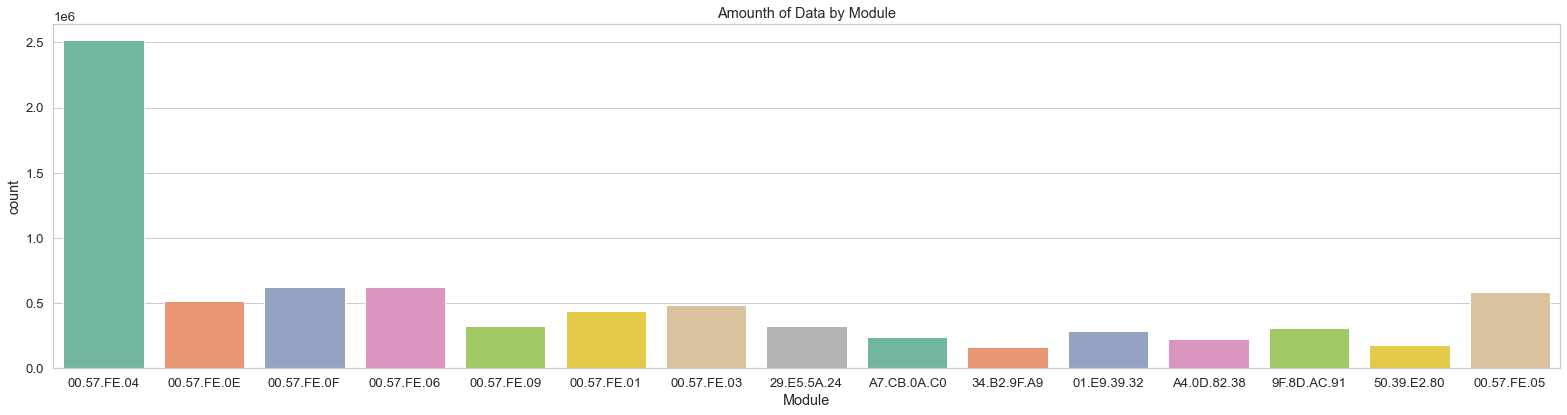

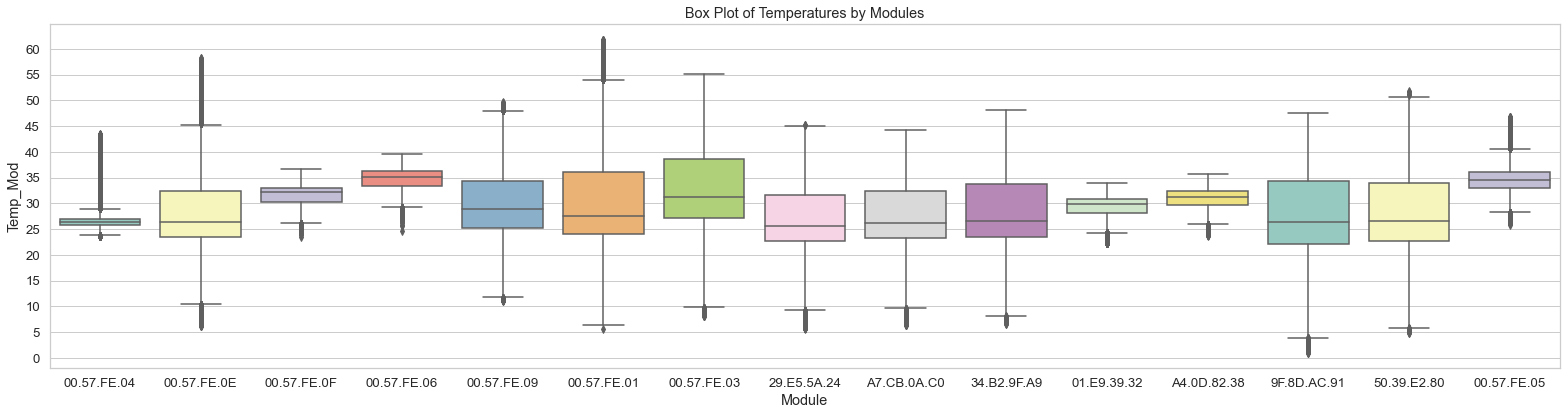

In [12]:
plt.figure(figsize=(22,6))
plt.title('Amounth of Data by Module')
sns.countplot(x='Module', data=df, palette='Set2')
plt.tight_layout()

plt.figure(figsize=(22,6))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Module',y='Temp_Mod',data=df, palette='Set3')
plt.yticks(ticks=np.arange(0,65,step=5))
plt.tight_layout()

#### Exploring the distribution of temperatures over the different Modules

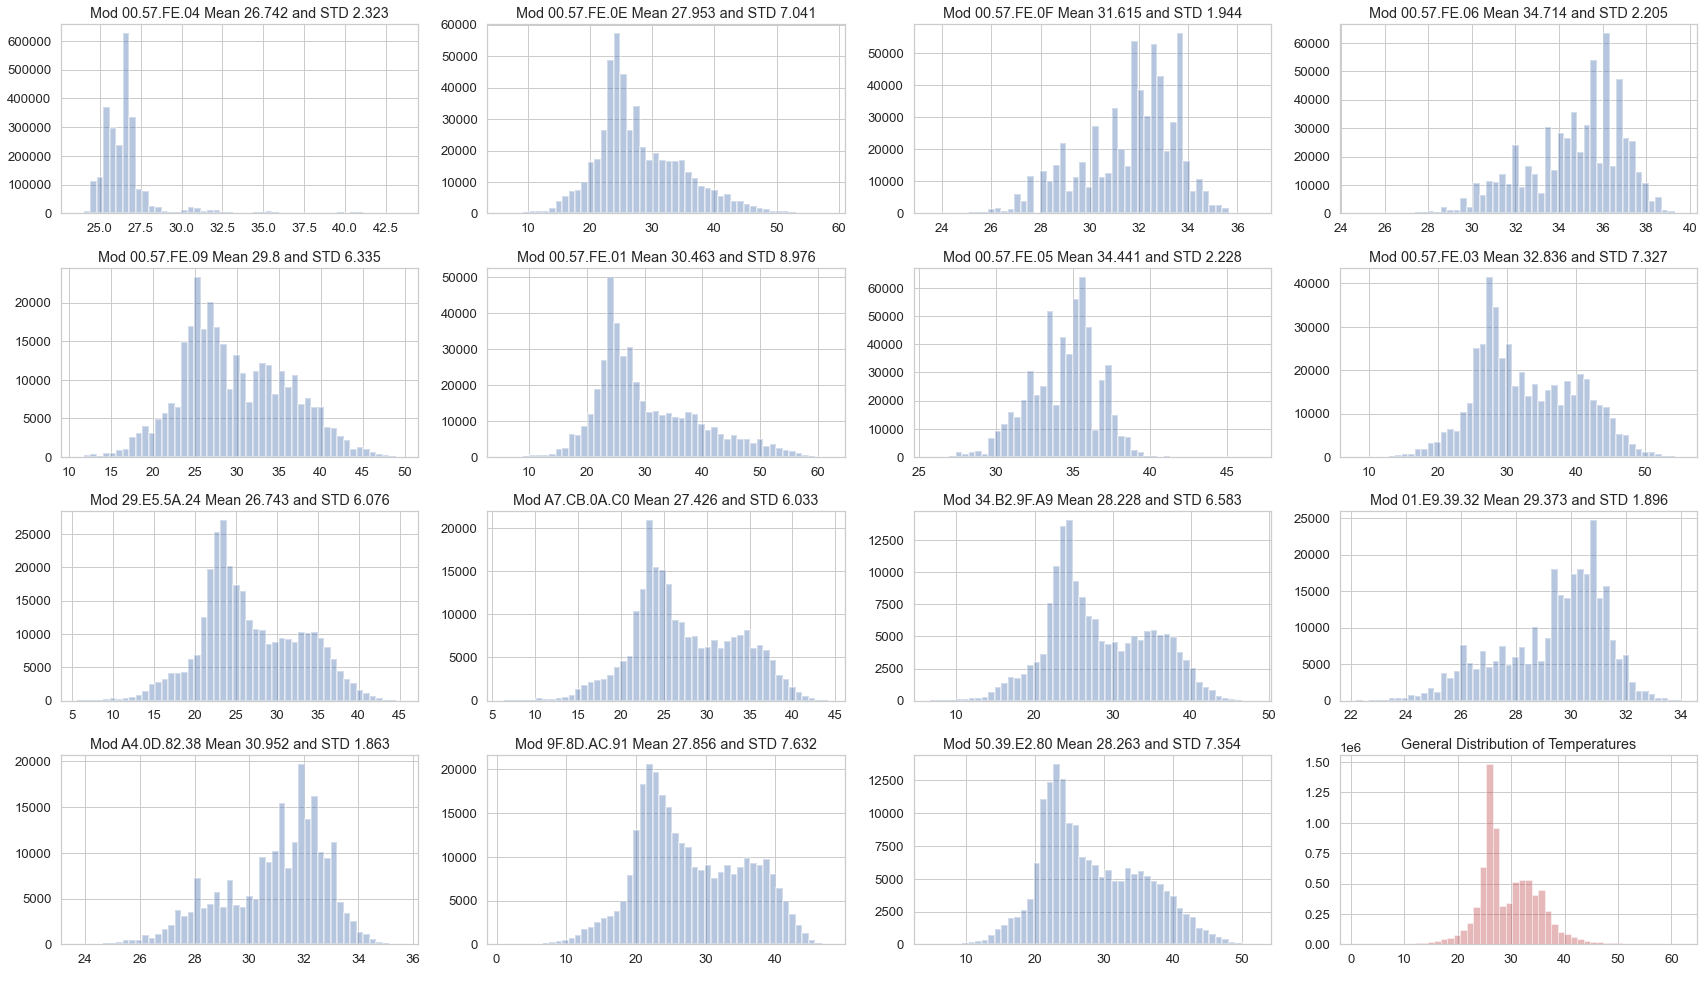

In [394]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(24,14), sharex=False)
#fig.delaxes(axes[3,3])
for i, ax in zip(Modules, axes.flat):
    sns.distplot(df[df['Module'] == i]['Temp_Mod'], kde=False, ax=ax, color='b', hist_kws={"linewidth":2})
    ax.set_title('Mod {} Mean {} and STD {}'.format(i, df[df['Module'] == i]['Temp_Mod'].mean().round(3), df[df['Module'] == i]['Temp_Mod'].std().round(3)))
    ax.set_xlabel('')
plt.title('General Distribution of Temperatures')
sns.distplot(a = df['Temp_Mod'], kde=False, color = 'r',
            kde_kws={"color": "b", "alpha":0.2, "linewidth": 5, "shade":True })
plt.xlabel(' ')
plt.tight_layout()

#### Exploring Distribution of VBus over different Modules. The Distributions can be normalized to be in a range of 0 to 1 to see the variations better.

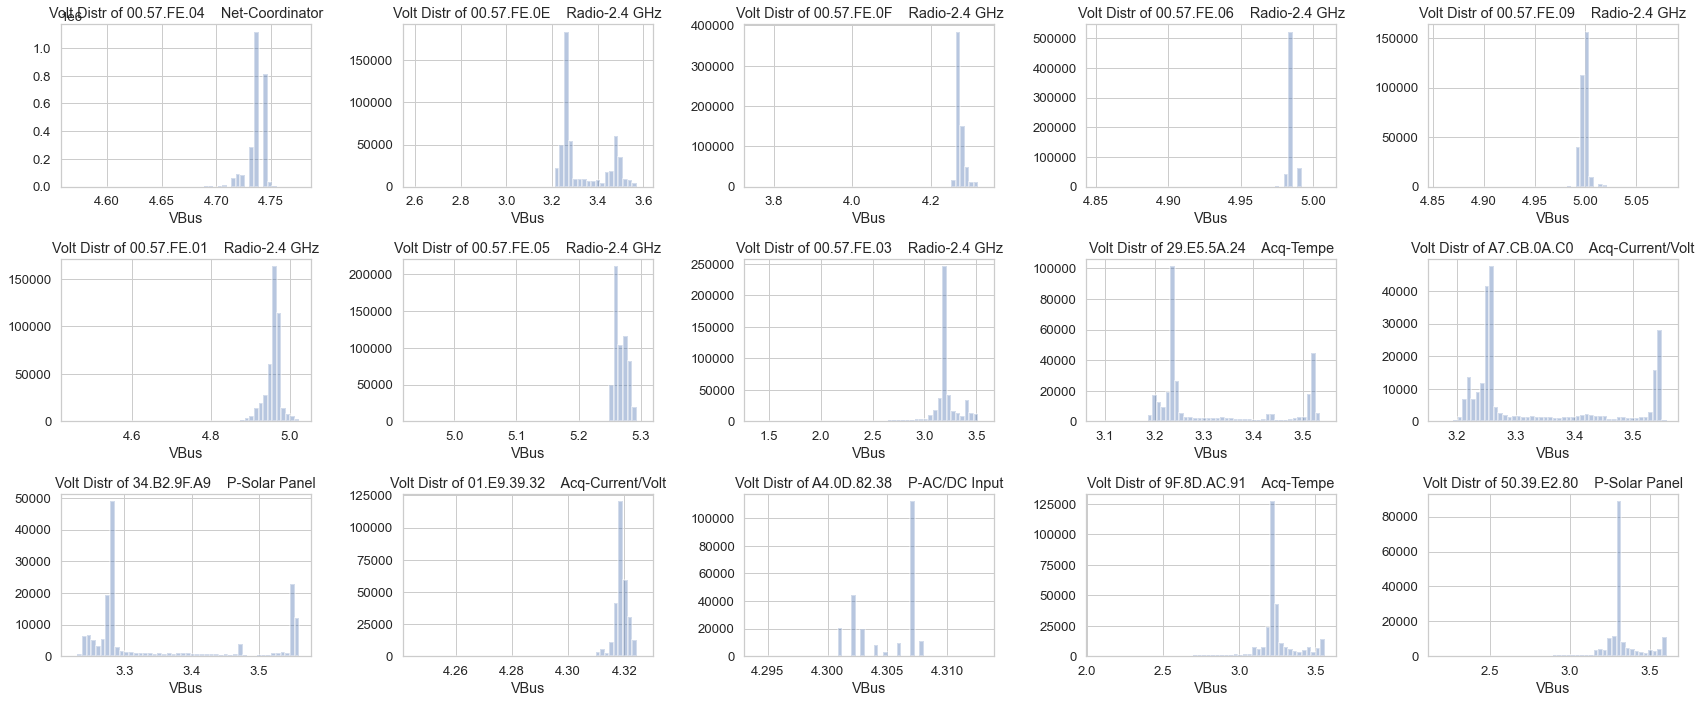

In [390]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(24,10), sharex=False)
#fig.delaxes(axes[3,3])
for i, ax in zip(Modules, axes.flat):
    sns.distplot(df[df['Module'] == i]['VBus'], kde=False, ax=ax, hist_kws={"linewidth":2})
    #sns.distplot(df[df['Module'] == i]['VBus']/df[df['Module'] == i]['VBus'].max(), kde=False, ax=ax, hist_kws={"linewidth":2}, color='r')   # UNCOMMENT TO NORMALIZE THE DATA
    ax.set_title('Volt Distr of {}    {}'.format(i, Modules[i]))
    #ax.set_xticks(np.arange(0,1,step=0.1))
plt.tight_layout()

As we can see, there is almost no variation in Voltage Bus. Modules connected to the line presents almost no variation and other modules like those connected to other sources, like the solar panels presents more variation.

#### Exploring Distribution of other features over different Modules.

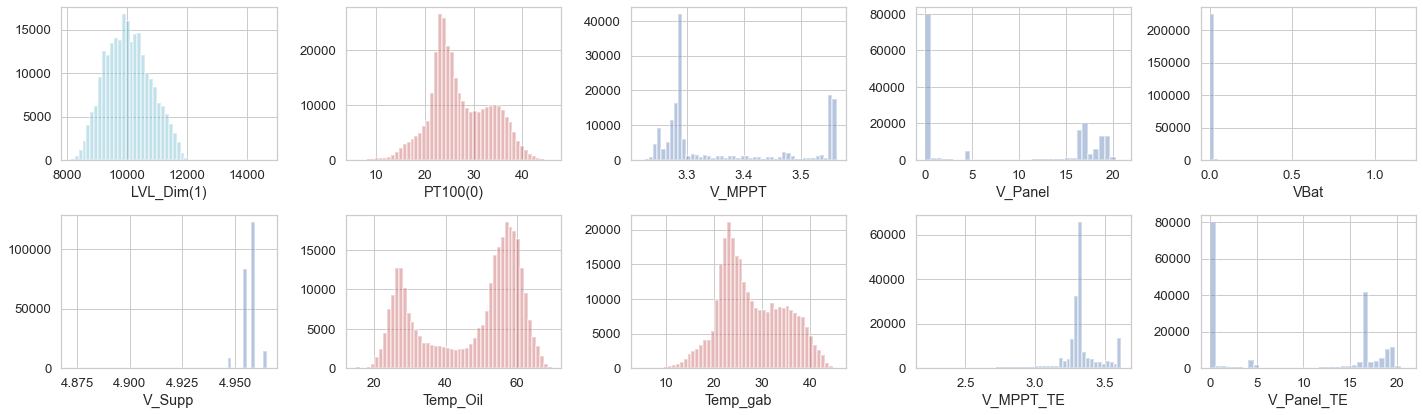

In [129]:
fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(20,6), )
sns.distplot(a = df[df['Module']=='A7.CB.0A.C0']['LVL_Dim(1)'], kde=False, ax=axarr[0,0], color='c', hist_kws={"linewidth":2})
sns.distplot(a = df[df['Module']=='29.E5.5A.24']['PT100(0)'], kde=False, ax=axarr[0,1], color='r', hist_kws={"linewidth":2})
sns.distplot(a = df[df['Module']=='34.B2.9F.A9']['V_MPPT'], kde=False, ax=axarr[0,2], color='b', hist_kws={"linewidth":2})
sns.distplot(a = df[df['Module']=='34.B2.9F.A9']['V_Panel'], kde=False, ax=axarr[0,3], color='b', hist_kws={"linewidth":2})
sns.distplot(a = df[df['Module']=='A4.0D.82.38']['VBat'], kde=False, ax=axarr[0,4], color='b', hist_kws={"linewidth":2})
sns.distplot(a = df[df['Module']=='A4.0D.82.38']['V_Supp'], kde=False, ax=axarr[1,0], color='b', hist_kws={"linewidth":2})
sns.distplot(a = df[df['Module']=='9F.8D.AC.91']['Temp_Oil'], kde=False, ax=axarr[1,1], color='r', hist_kws={"linewidth":2})
sns.distplot(a = df[df['Module']=='9F.8D.AC.91']['Temp_gab'], kde=False, ax=axarr[1,2], color='r', hist_kws={"linewidth":2})
sns.distplot(a = df[df['Module']=='50.39.E2.80']['V_MPPT_TE'], kde=False, ax=axarr[1,3], color='b', hist_kws={"linewidth":2})
sns.distplot(a = df[df['Module']=='50.39.E2.80']['V_Panel_TE'], kde=False, ax=axarr[1,4], color='b', hist_kws={"linewidth":2})
plt.tight_layout()

### **Feature Engineering from Date**

Let's explore how this features variate over time. For that, i added columns with hour, month, year, day, and week. The columns are created using the same Timestamp corresponding with the data. The Temperature and voltages are going to be more examined since is present in avery module, the rest is not.

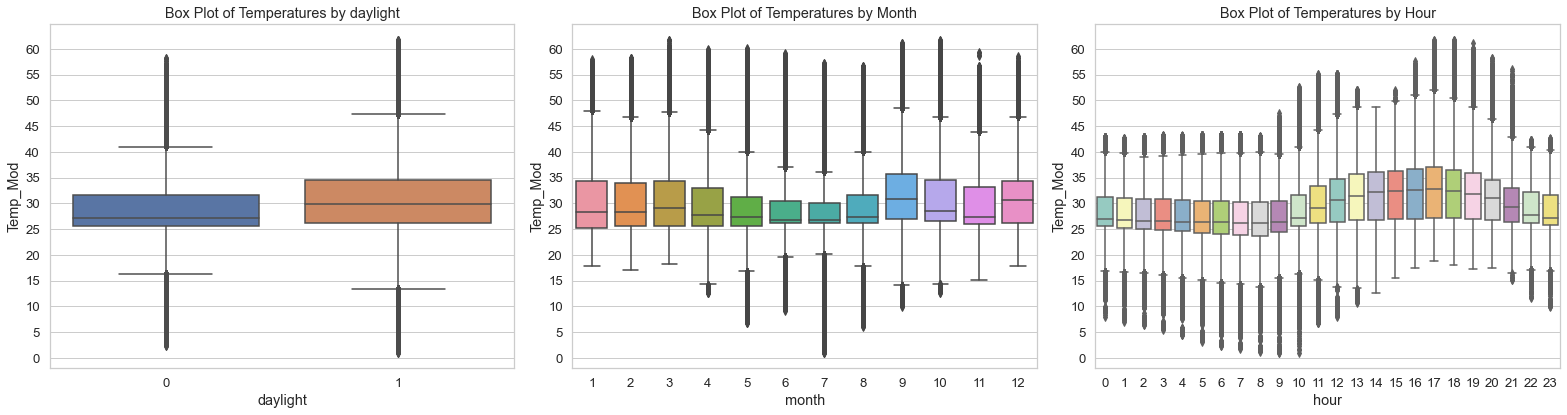

In [401]:
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(22,6), sharex=False)
axarr[0].set_title('Box Plot of Temperatures by daylight')
axarr[0].set_yticks(ticks=np.arange(0,65,step=5))
sns.boxplot(x='daylight',y='Temp_Mod',data=df, ax=axarr[0])
axarr[1].set_title('Box Plot of Temperatures by Month')
axarr[1].set_yticks(ticks=np.arange(0,65,step=5))
sns.boxplot(x='month',y='Temp_Mod',data=df, ax=axarr[1])
axarr[2].set_title('Box Plot of Temperatures by Hour')
axarr[2].set_yticks(ticks=np.arange(0,65,step=5))
sns.boxplot(x='hour',y='Temp_Mod',data=df, ax=axarr[2], palette='Set3')
plt.tight_layout()

**We can also see the variation of a specific module in time. For example, taking module 9F.8D.AC.91**

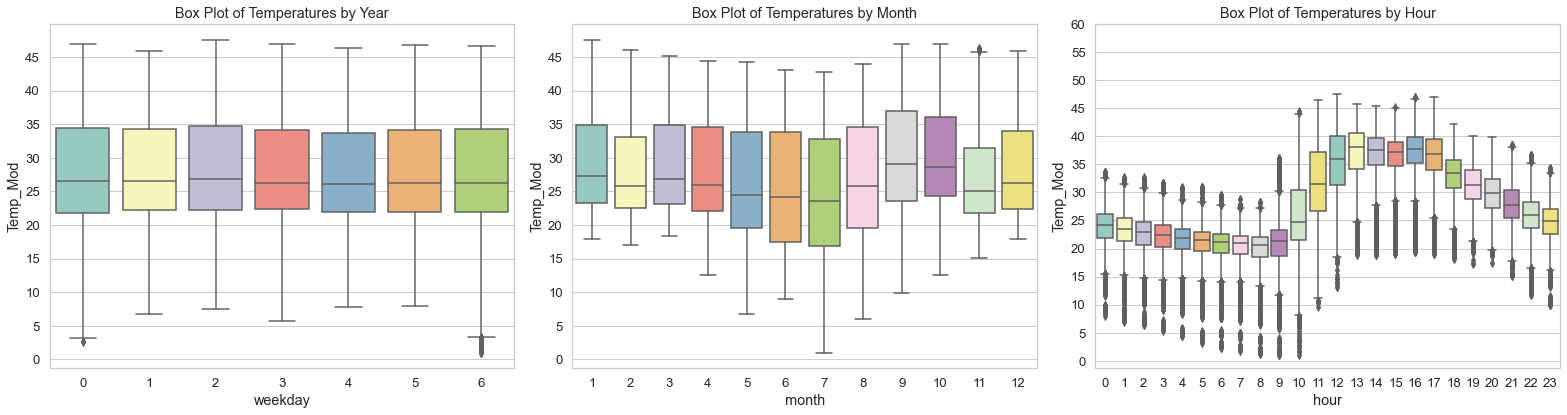

In [404]:
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(22,6), sharex=False)
axarr[0].set_title('Box Plot of Temperatures by Year')
axarr[0].set_yticks(ticks=np.arange(0,65,step=5))
sns.boxplot(x='weekday',y='Temp_Mod',data=df[df['Module']=='9F.8D.AC.91'], ax=axarr[0], palette='Set3')
axarr[1].set_title('Box Plot of Temperatures by Month')
axarr[1].set_yticks(ticks=np.arange(0,65,step=5))
sns.boxplot(x='month',y='Temp_Mod',data=df[df['Module']=='9F.8D.AC.91'], ax=axarr[1], palette='Set3')
axarr[2].set_title('Box Plot of Temperatures by Hour')
axarr[2].set_yticks(ticks=np.arange(0,65,step=5))
sns.boxplot(x='hour',y='Temp_Mod',data=df[df['Module']=='9F.8D.AC.91'], ax=axarr[2], palette='Set3')
axarr[2].set_yticks(ticks=np.arange(0,65,step=5))
plt.tight_layout()

**We can see how the temperatures start to increase after 8:00 until 17:00, that starts to go down, this corresponds with the day cicle, also we can see how the temperatures are lower in months of winter and higher in summer.**

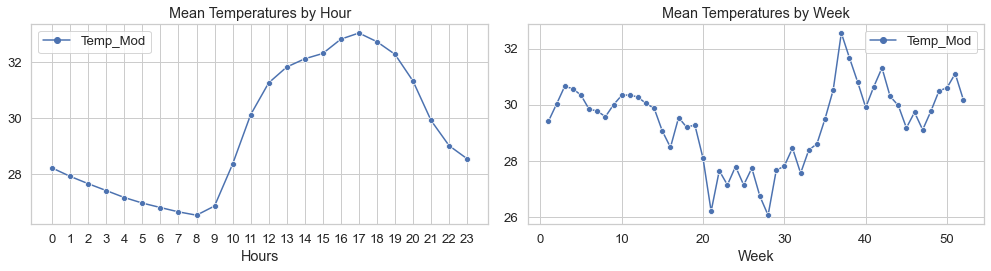

In [144]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,4), sharex=False)
ax0.set_title('Mean Temperatures by Hour')
data = df.groupby('hour').mean()[['Temp_Mod']]
sns.lineplot(data = data, markers=True,ax=ax0)
ax0.set_xticks(np.arange(0,24, step=1))
ax0.set_xlabel('Hours')

ax1.set_title('Mean Temperatures by Week')
data=df.groupby('week').mean()[['Temp_Mod']]
sns.lineplot(data = data, markers=True,ax=ax1)
ax1.set_xlabel('Week')
plt.tight_layout()

**Next is the Boxplot of all the features, first by month and then by hour.**

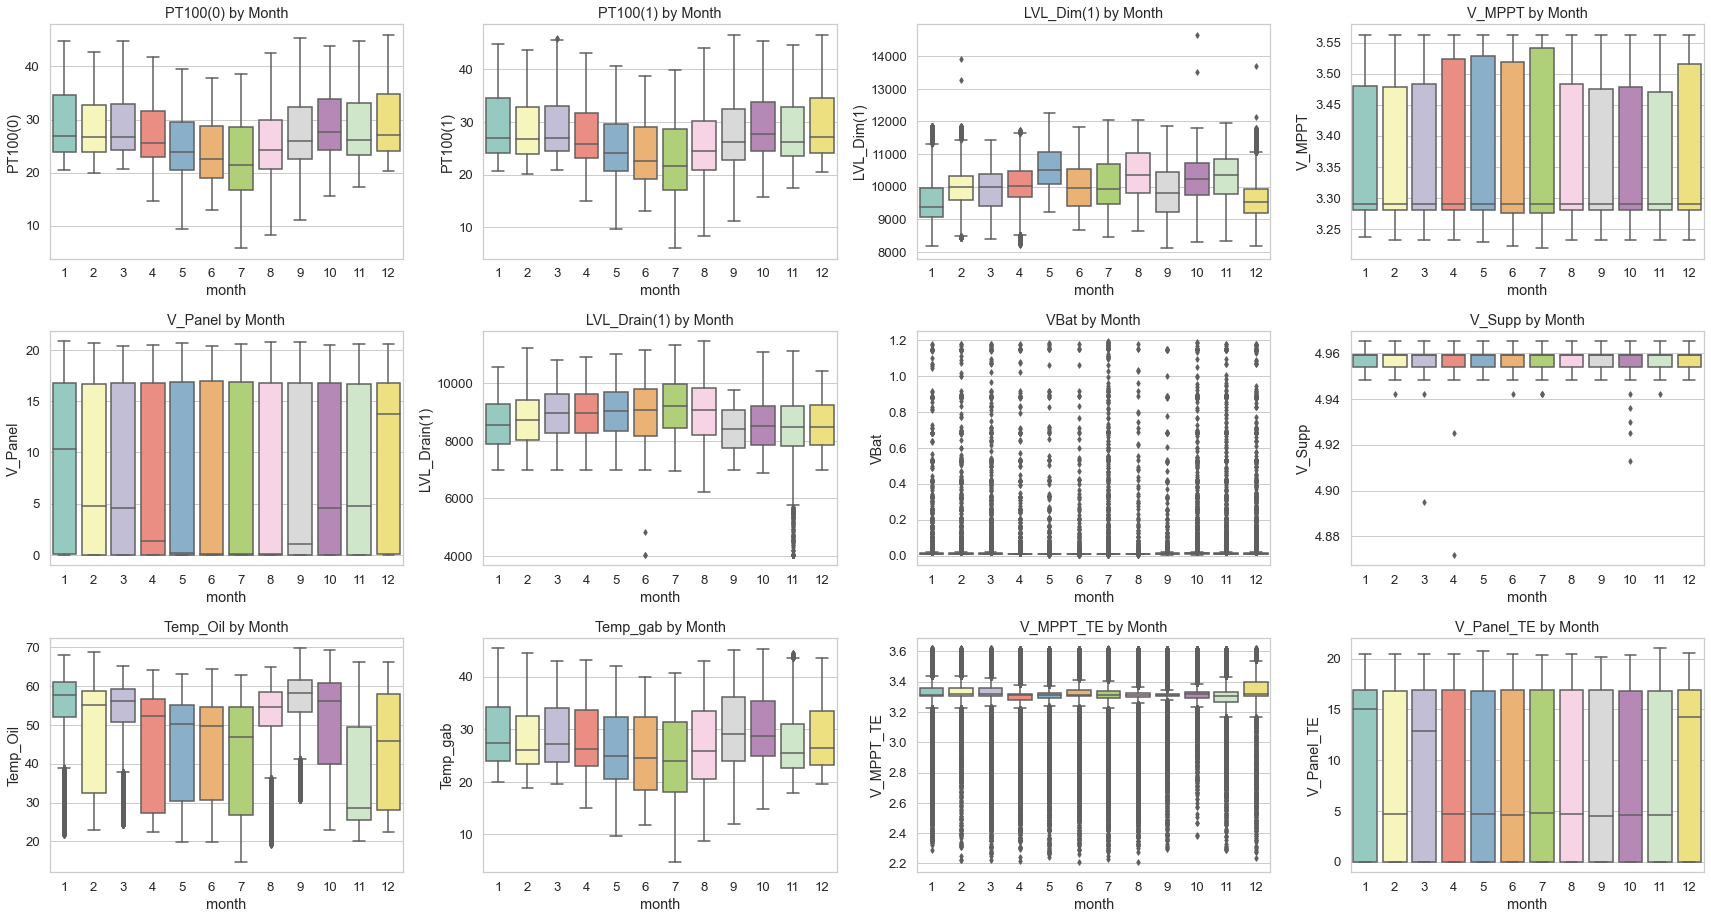

In [150]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24,13), sharex=False)
#fig.delaxes(axes[3,3])
for i,ax in zip(df.columns[10:], axes.flat):
    ax.set_title('{} by Month'.format(i))
    sns.boxplot(x='month',y= i,data=df, ax=ax, palette='Set3', fliersize=4)
plt.tight_layout()

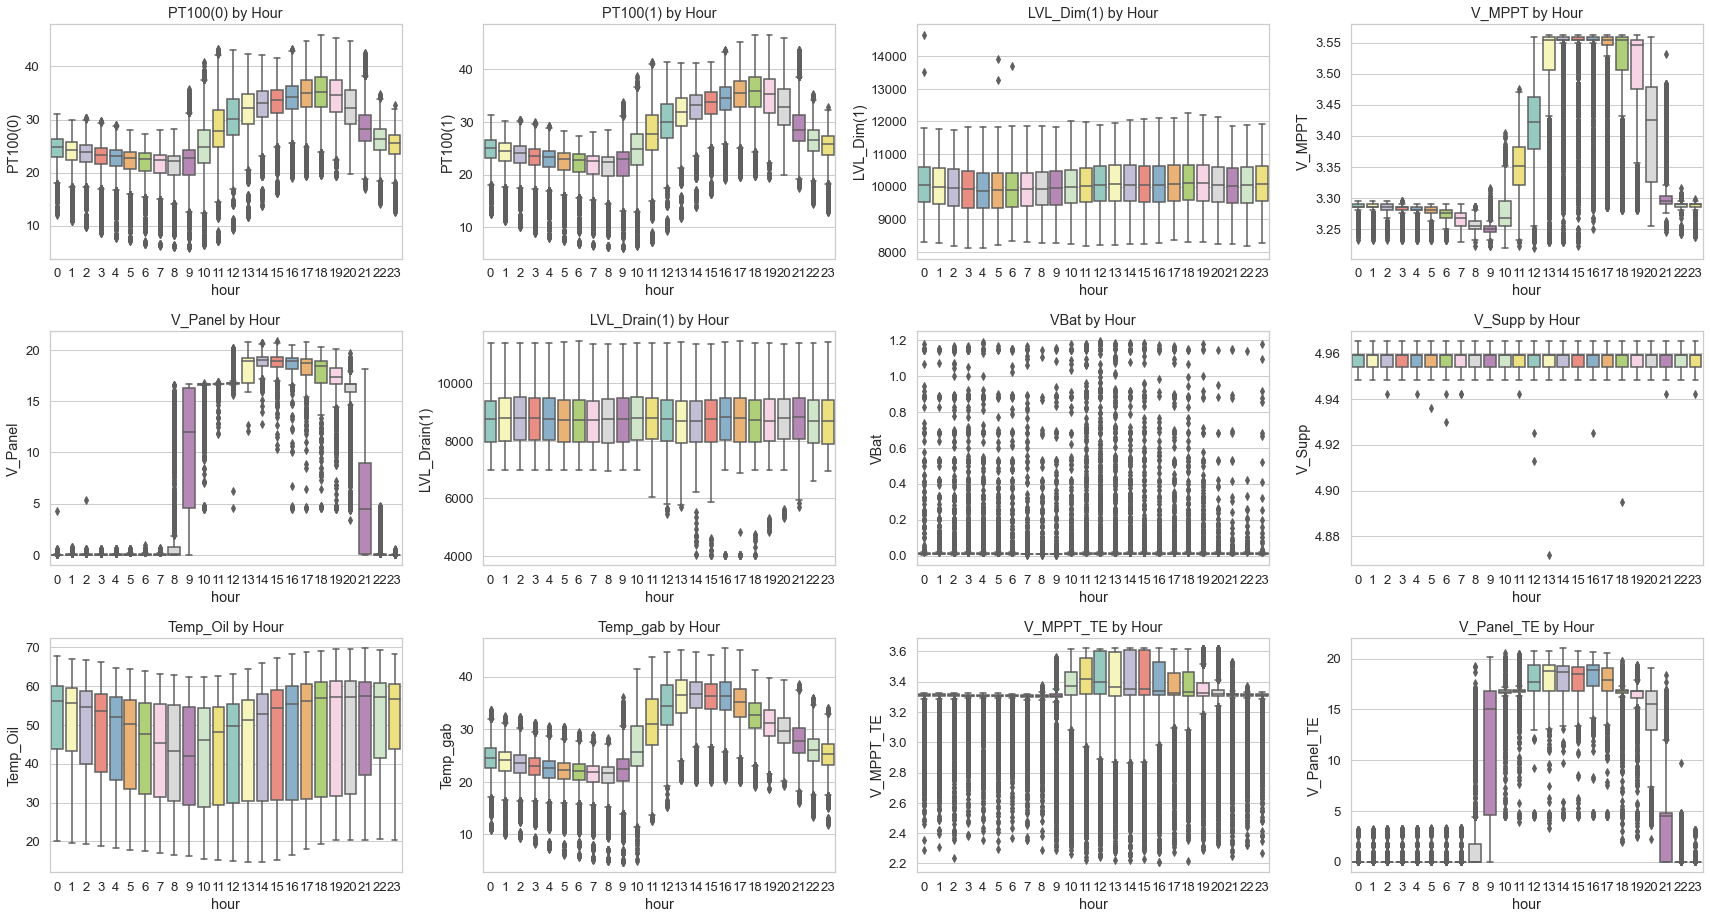

In [151]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24,13), sharex=False)
for i,ax in zip(df.columns[10:], axes.flat):
    ax.set_title('{} by Hour'.format(i))
    sns.boxplot(x='hour',y= i,data=df, ax=ax, palette='Set3')
plt.tight_layout()

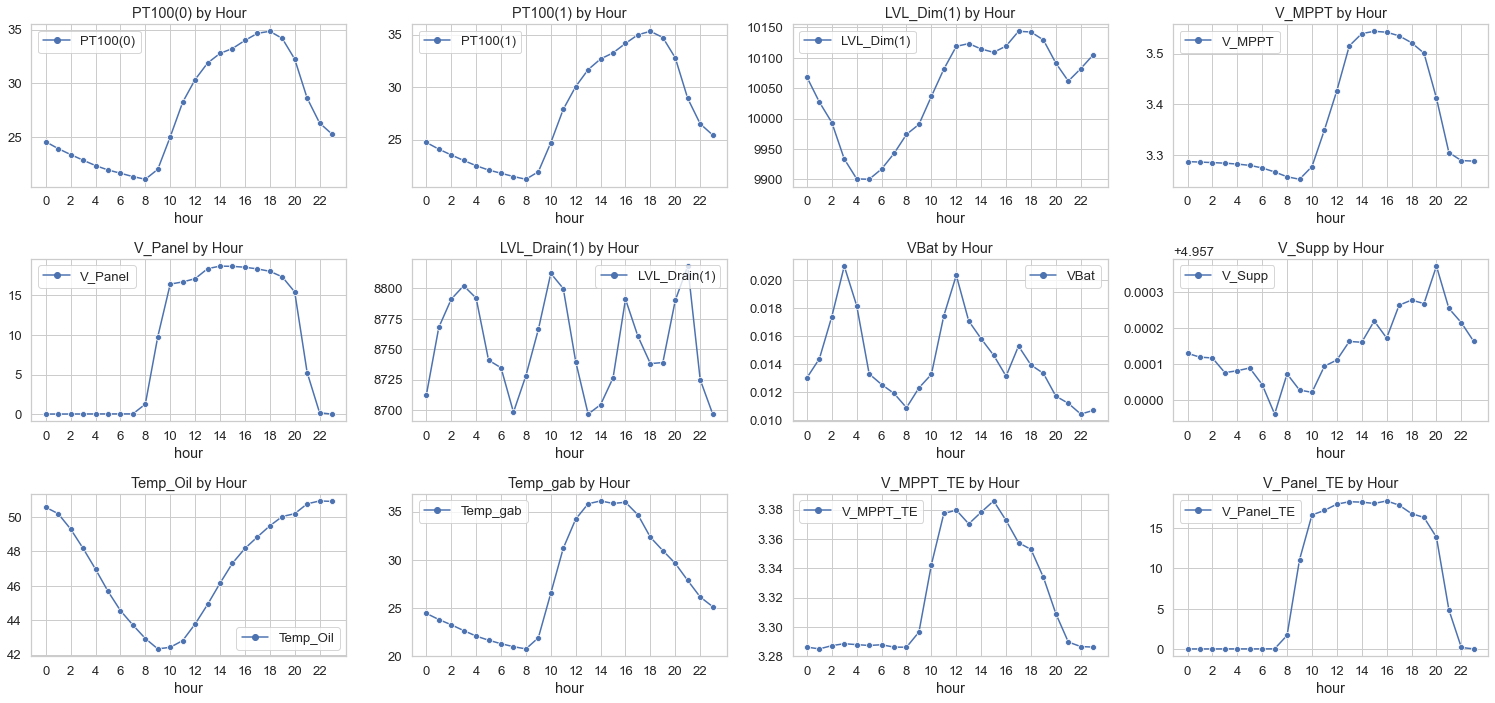

In [152]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(21,10), sharex=False)
for i,ax in zip(df.columns[10:], axes.flat):
    ax.set_title('{} by Hour'.format(i))
    data=df.groupby('hour').mean()[[i]]
    sns.lineplot(data=data, markers=True,ax=ax, err_style='bars')
    ax.set_xticks(np.arange(0,24,2))
plt.tight_layout()

### **Explore the correlation between the different features**

`pd.Corr()` Computes pairwise correlation of columns, excluding NA/null values. The NaN values are ignored, this makes sense because, for example, the voltage from the solar panels is not related at all with the temperature from the PT100 since they are different modules in different locations. Pearson correlation is used. Used a heatmap to see the values better. Empty spaces are NaN values, meaning no correaltion at all.

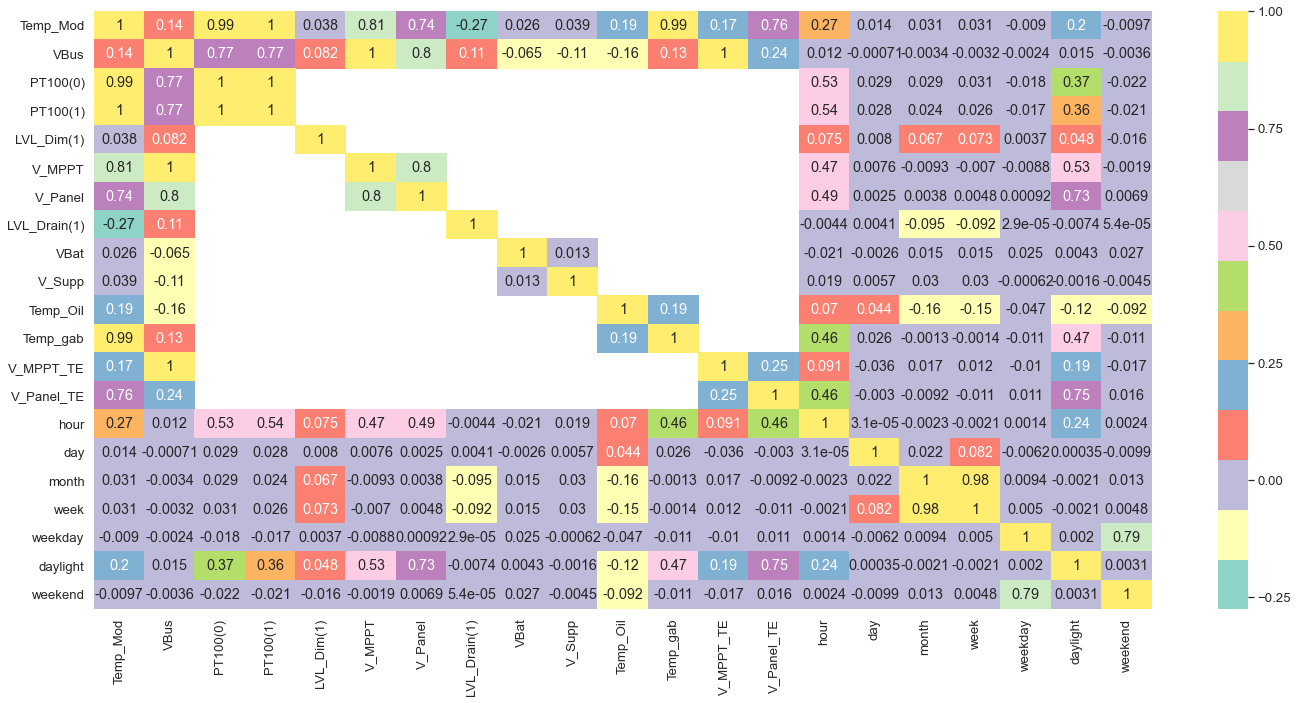

In [16]:
correlation = df.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, cmap='Set3')
plt.tight_layout()

#### Next is a graph of the correlation against temperature and voltage sorted. Better corr to the right.

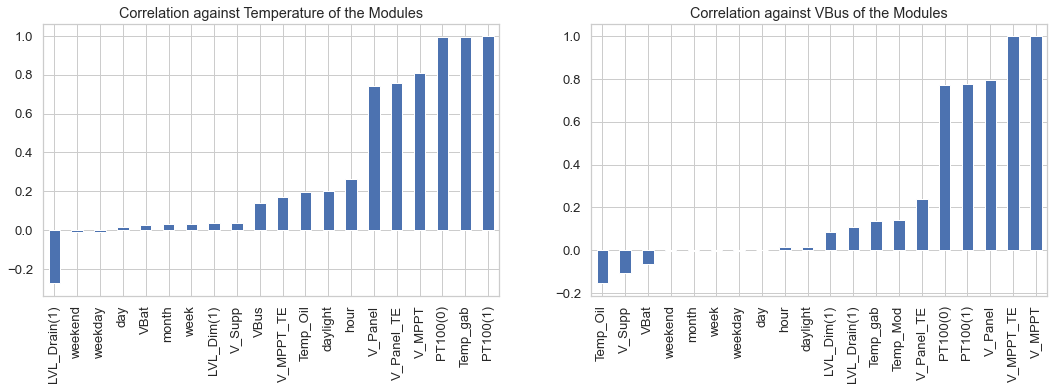

In [17]:
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
correlation['Temp_Mod'].sort_values()[:-1].plot(kind='bar', ax=axarr[0])
axarr[0].set_title('Correlation against Temperature of the Modules')
correlation['VBus'].sort_values()[:-1].plot(kind='bar', ax=axarr[1])
axarr[1].set_title('Correlation against VBus of the Modules')
plt.show()

#### Now let's explore the correlations graphically using a scatter plot

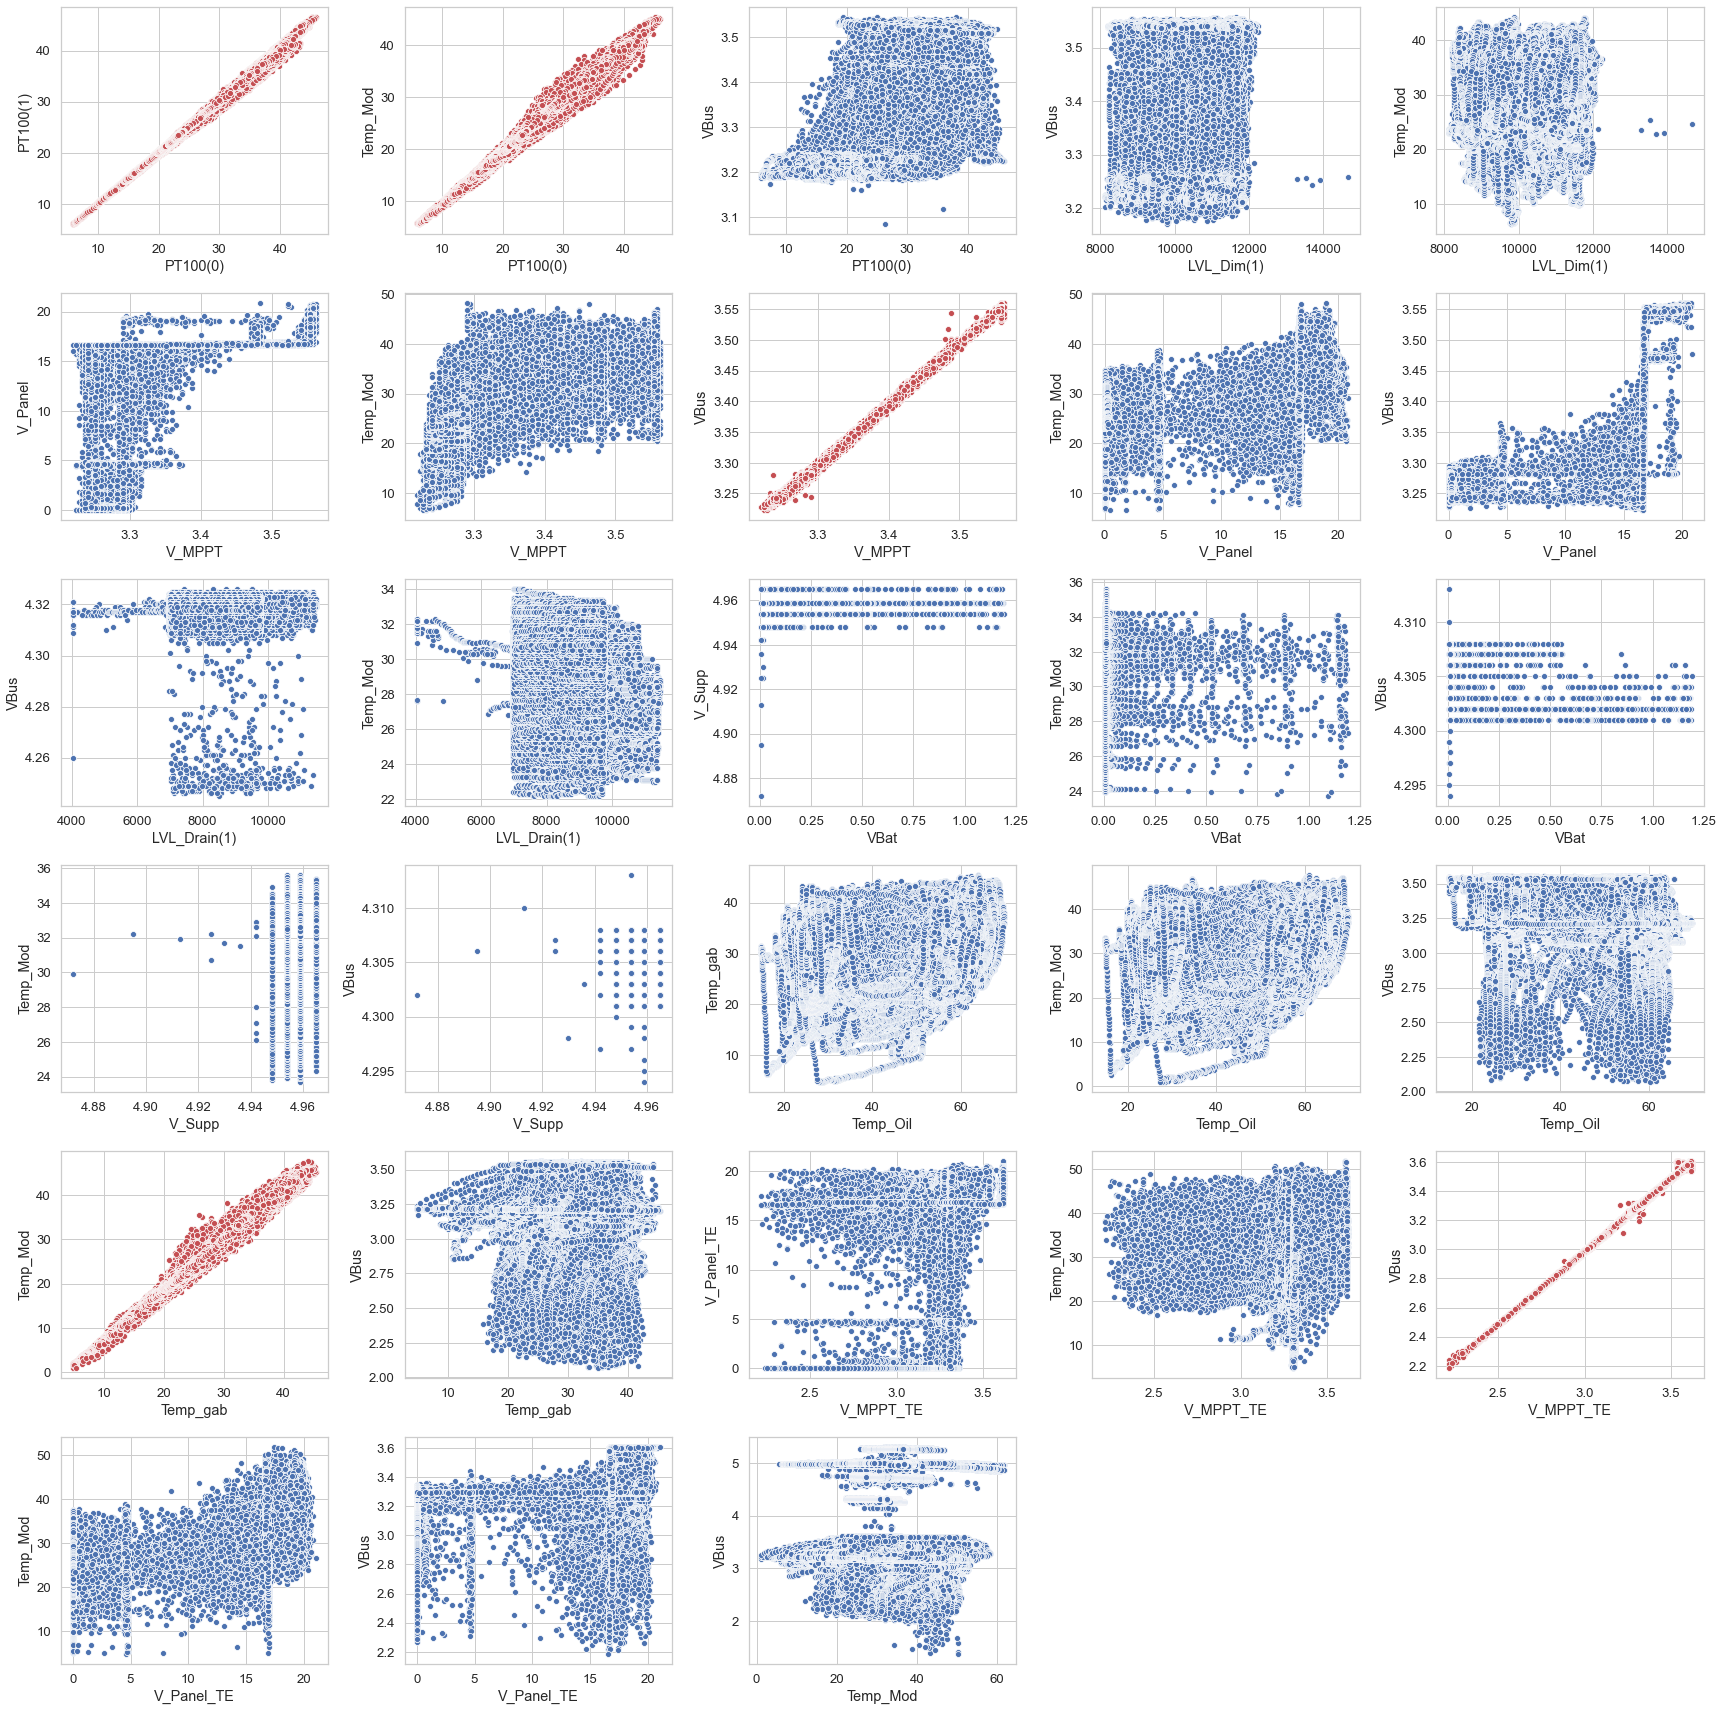

In [18]:
fig, axarr = plt.subplots(nrows=6, ncols=5, figsize=(24,24))
fig.delaxes(axarr[5,3])
fig.delaxes(axarr[5,4])
sns.scatterplot(x='PT100(0)',y='PT100(1)',data=df, ax=axarr[0,0], color='r')
sns.scatterplot(x='PT100(0)',y='Temp_Mod',data=df, ax=axarr[0,1], color='r')
sns.scatterplot(x='PT100(0)',y='VBus',data=df, ax=axarr[0,2])
sns.scatterplot(x='LVL_Dim(1)',y='VBus',data=df, ax=axarr[0,3])
sns.scatterplot(x='LVL_Dim(1)',y='Temp_Mod',data=df, ax=axarr[0,4])
sns.scatterplot(x='V_MPPT',y='V_Panel',data=df, ax=axarr[1,0])
sns.scatterplot(x='V_MPPT',y='Temp_Mod',data=df, ax=axarr[1,1])
sns.scatterplot(x='V_MPPT',y='VBus',data=df, ax=axarr[1,2], color='r')
sns.scatterplot(x='V_Panel',y='Temp_Mod',data=df, ax=axarr[1,3])
sns.scatterplot(x='V_Panel',y='VBus',data=df, ax=axarr[1,4])
sns.scatterplot(x='LVL_Drain(1)',y='VBus',data=df, ax=axarr[2,0])
sns.scatterplot(x='LVL_Drain(1)',y='Temp_Mod',data=df, ax=axarr[2,1])
sns.scatterplot(x='VBat',y='V_Supp',data=df, ax=axarr[2,2])
sns.scatterplot(x='VBat',y='Temp_Mod',data=df, ax=axarr[2,3])
sns.scatterplot(x='VBat',y='VBus',data=df, ax=axarr[2,4])
sns.scatterplot(x='V_Supp',y='Temp_Mod',data=df, ax=axarr[3,0])
sns.scatterplot(x='V_Supp',y='VBus',data=df, ax=axarr[3,1])
sns.scatterplot(x='Temp_Oil',y='Temp_gab',data=df, ax=axarr[3,2])
sns.scatterplot(x='Temp_Oil',y='Temp_Mod',data=df, ax=axarr[3,3])
sns.scatterplot(x='Temp_Oil',y='VBus',data=df, ax=axarr[3,4])
sns.scatterplot(x='Temp_gab',y='Temp_Mod',data=df, ax=axarr[4,0], color='r')
sns.scatterplot(x='Temp_gab',y='VBus',data=df, ax=axarr[4,1])
sns.scatterplot(x='V_MPPT_TE',y='V_Panel_TE',data=df, ax=axarr[4,2])
sns.scatterplot(x='V_MPPT_TE',y='Temp_Mod',data=df, ax=axarr[4,3])
sns.scatterplot(x='V_MPPT_TE',y='VBus',data=df, ax=axarr[4,4], color='r')
sns.scatterplot(x='V_Panel_TE',y='Temp_Mod',data=df, ax=axarr[5,0])
sns.scatterplot(x='V_Panel_TE',y='VBus',data=df, ax=axarr[5,1])
sns.scatterplot(x='Temp_Mod',y='VBus',data=df, ax=axarr[5,2])
plt.tight_layout()

## **Visualizing the features as Time Series**

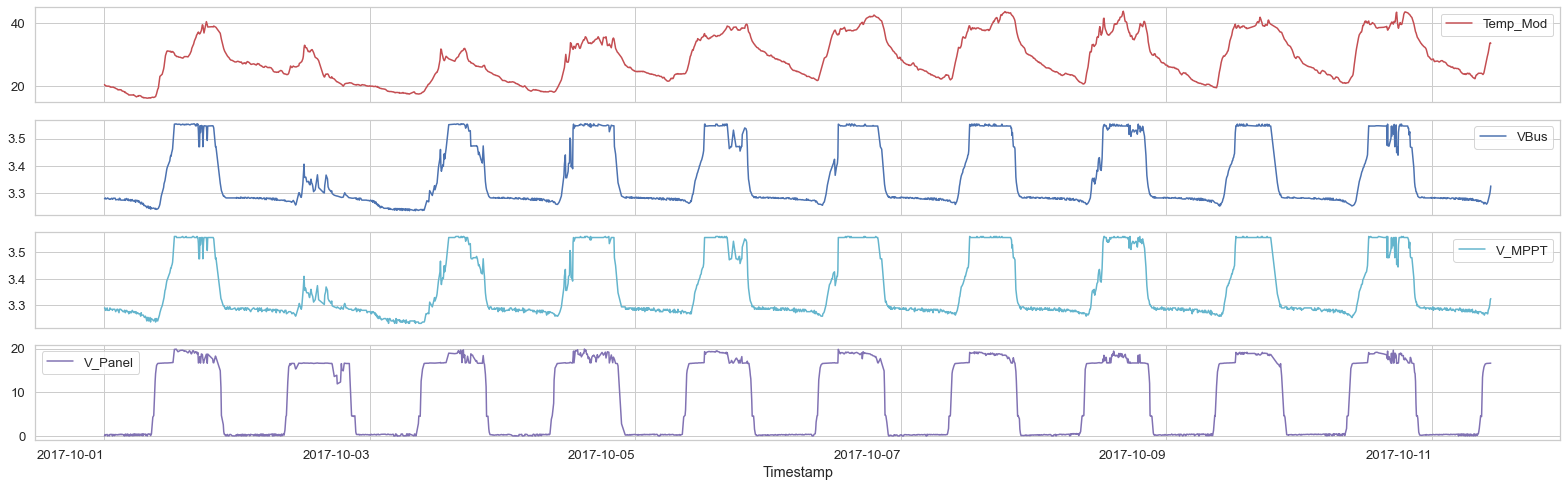

In [142]:
module = df['Module'].unique()[9]
subset = df[df['Module'] == module][:2000]
subset = subset.dropna(axis=1, how='all')

fig, axx = plt.subplots(4, 1, figsize=(22,7), sharex=True)
subset.plot(x ='Timestamp', y = 'Temp_Mod', ax=axx[0], color='r')
subset.plot(x ='Timestamp', y = 'VBus', ax=axx[1], color='b')
subset.plot(x ='Timestamp', y = 'V_MPPT', ax=axx[2], color='c')
subset.plot(x ='Timestamp', y = 'V_Panel', ax=axx[3], color='m')
plt.xticks(rotation=0)
plt.tight_layout()

The first 4 time series corresponds to the features of a single module, Radios only have 2 componensts, others 3 or 4. We can see that 200 samples correspond to 1 day approximatly.

**Any time series may be split into the following components: Base Level + Trend + Seasonality + Error**. We can see that the time series reflects a clear seasonality and no trend indication.

## Exploring all modules Temperature Correlation

In Poço de Drenagem A location is Router 57.FE.0F, wich communicates with:

     Acquisition - Current / Voltage 01.E9.39.32  which is a level probe , uses channel 1.
     Power - AC/DC Input A4.0D.82.38 that measures voltage from Battery and Supply voltage using channel 0 and 1, and it's temperature and VBus using channel 7 and 6.

In Montante UG5 location is Router 57.FE.0E, wich communicates with Sensors:

    Acquisition - Temperature 29.E5.5A.24  that extract info from (2) PT100 using channels 0 and 1, and it's temperature and VBus using channel 7 and 6. 
     Acquisition - Current / Voltage A7.CB.0A.C0 that extract info about the level in the dim using channel 1, and it's temperature and VBus using channel 7 and 6.
     Power - Solar Panel 34.B2.9F.A9 that extract the MPPT voltage and the voltage from the solar panel using channels 0 and 1.

In [83]:
def corr_between(df, m1='A4.0D.82.38', m2='01.E9.39.32',feature_1='Temp_Mod', feature_2='Temp_Mod'):
    # A4.0D.82.38":'P-AC/DC Input
    temp_sensor_1 = df[df['Module']==m1].dropna(axis=1, how='all')[feature_1]
    temp_sensor_1 = temp_sensor_1.rename(m1, axis=1)
    #  01.E9.39.32":'Acq-Current/Volt
    temp_sensor_2 = df[df['Module']==m2].dropna(axis=1, how='all')[feature_2]
    temp_sensor_2 = temp_sensor_2.rename(m2,axis=1)
    temp_corr = pd.concat([temp_sensor_1, temp_sensor_2], axis=1)
    temp_corr = temp_corr.resample('5Min').mean()
    temp_corr = temp_corr.fillna(temp_corr.bfill())
    return temp_corr

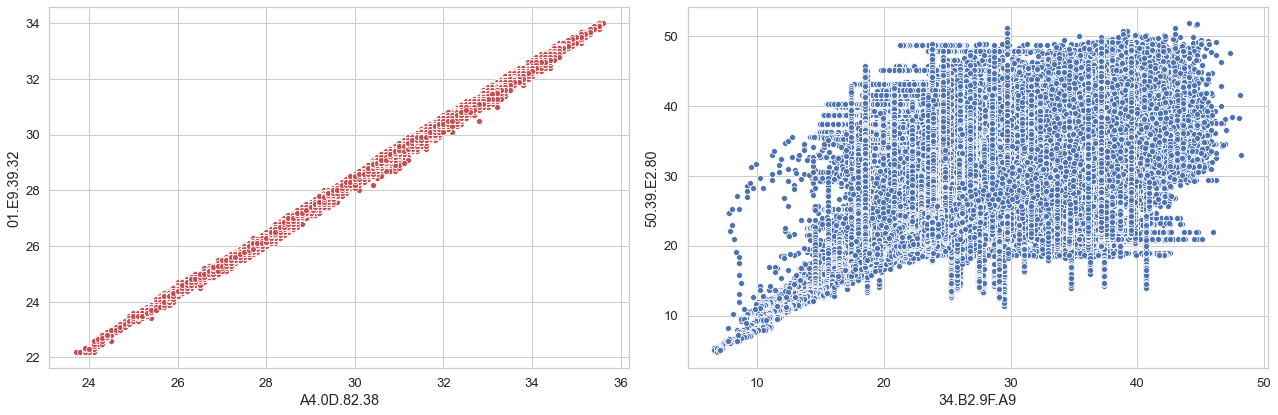

In [89]:
temp_corr = corr_between(df, m1='A4.0D.82.38', m2='01.E9.39.32')
solar_level = corr_between(df, m1='34.B2.9F.A9', m2='50.39.E2.80', feature_1='Temp_Mod', feature_2='Temp_Mod')
fig, axx = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.scatterplot(x='A4.0D.82.38', y='01.E9.39.32',data=temp_corr, ax=axx[0], color='r')
sns.scatterplot(x=solar_level.columns[0], y=solar_level.columns[1],data=solar_level, ax=axx[1])
plt.tight_layout()